In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression


This Jupyter notebook contains an outline of the theory behind the linear regression algorithm. Here we will discuss and implement the linear regression model using the traditional linear algebra approach. The idea is to understand the algorithm as a whole. 

Nowadays a resercher interested in implementing a linear regression model (or others) can make use of API's. All he/she has to do is to instantiate the desired object and use the methods to fit the data and make predictions. Although this is very convenient, the researcher might not understand what is going on inside the algorithm, what it is computing, or even find sources of errors. Even worse, the researcher might not understand the assumptions and limitations of the algorithm and could naively apply it to cases in which the assumptions are not valid. 

This humble step by step implementation forces the researcher to write and understand the code. It also forces him/her to check if the assumptions make sense. Only after the implementation is complete we will discuss the use of API's. Not always the programmer writes the fastest codes, and API's are in general efficient. But it is much better to lose a little of speed processing ang gain more certainty.

### Disclaimer

These codes are not meant to be fully original. Although some functions were created by me, others were inspired and adapted from different sources. 

# Assumptions of linear regression model

There are two main assumptions in the linear regression model:

 **1. Linear dependence**: The dependent variable and the explanatory variables have a linear relationship. Before fitting the model the researcher must plot the dependent variable in terms of the explanatory variables in order to check if there is a visible linear relationship.
 
 
 **2. Normally distributed residuals**: The residuals must follow a normal distibution, so $E[u_i] = 0$.

# Estimation techniques

The most common estimations techniques are:

 **1. Ordinary Least Squares**
 
 
 **2. Variations of OLS**: Generalized Least Squares, Penalized Least Squares, i.e., L1 (LASSO) and L2 (Ridge)
 
In this discussion we will implement only the Ordinary Least Squares estimation using matrices rules.

# Theory

We will create our own class to fit a linear regression model. In matrix form, a linear regression model is expressed as

$$
y = X \beta + u.\tag{1}
$$

In terms of its components we have

$$
\begin{bmatrix}
y_1\\
y_2\\
:\\
y_n\\
\end{bmatrix} = 
\begin{bmatrix}
1 & x_{11} & x_{12} & ... & x_{1K} \\
1 & x_{21} & x_{22} & ... & x_{2K}\\
: & : & : & : & :\\
1 & x_{n1} & x_{n2} & ... & x_{nK}\\
\end{bmatrix}
\begin{bmatrix}
\beta_0\\
\beta_1\\
:\\
\beta_K\\
\end{bmatrix}
+
\begin{bmatrix}
u_1\\
u_2\\
:\\
u_n\\
\end{bmatrix}, \tag{2}
$$

where $y$ is the dependent variable, $X$ is the feature matrix whose values are the independent variables $x_{ij}$, and the error term is $u = y - X\beta$. Here, $\beta$ is the vector whose values are the angular coefficients of the linear regression for each dimension. 

The regression line is the one that minimizes the sum of quadratic residuals, denoted by $SQR$, and given by

$$
SQR(\beta) = u^{T}u = (y - X\beta)^{T}(y - X\beta)\tag{3}.
$$

Some authors refer to this as $RSS$ for residual sum of squares, or $RSS$ for sum of squared residuals. We must find $\beta$ so that $SQR$ is minimum. In order to do so, we take the first derivative with respect to $\beta$, make the result equal to zero, use matrices rules, and finally compute the coefficients as

$$
\beta = (X^{T}X)^{-1}X^{T}y. \tag{4}
$$

Let us show how this result is obtained. In equation form $SQR$ is written as

$$
SQR(\beta) = \left(y_{1} - (\beta_0 + \beta_1 x_{11} + ... + \beta_K x_{1K})\right)^{2} + ... + \left(y_{n} - (\beta_0 + \beta_1 x_{n1} + ... + \beta_K x_{nK})\right)^{2}. \tag{5}
$$

Let us take the first derivative of this expression with respect to $\beta_0$:

$$
\frac{\partial SQR(\beta)}{\partial \beta_0} = 2\left(y_{1} - (\beta_0 + \beta_1 x_{11} + ... + \beta_K x_{1K})\right)(-1) + ... + 2\left(y_{n} - (\beta_0 + \beta_1 x_{n1} + ... + \beta_K x_{nK})\right)(-1). \tag{6}
$$

We can group this expression in order to rewrite it in matrix form as

$$
\frac{\partial SQR(\beta)}{\partial \beta_0} = -2[1 ... 1](y - X\beta). \tag{7}
$$

Now, let us take the first derivative with respect to $\beta_1$:

$$
\frac{\partial SQR(\beta)}{\partial \beta_1} = 2\left(y_{1} - (\beta_0 + \beta_1 x_{11} + ... + \beta_K x_{1K})\right)(-x_{11}) + ... + 2\left(y_{n} - (\beta_0 + \beta_1 x_{n1} + ... + \beta_K x_{nK})\right)(-x_{n1}). \tag{8}
$$

In matrix form we have

$$
\frac{\partial SQR(\beta)}{\partial \beta_1} = -2[x_{11} ... x_{n1}](y - X\beta). \tag{9}
$$

We can easily generalize this computation and write the result in matrix form

$$
\begin{bmatrix}
\frac{\partial SQR(\beta)}{\partial \beta_0}\\
\frac{\partial SQR(\beta)}{\partial \beta_1}\\
:\\
\frac{\partial SQR(\beta)}{\partial \beta_n}\\
\end{bmatrix} = -2
\begin{bmatrix}
1 & 1 & 1 & ... & 1 \\
x_{11} & x_{21} & x_{31} & ... & x_{n1}\\
: & : & : & : & :\\
x_{1K} & x_{2K} & x_{3K} & ... & x_{nK}\\
\end{bmatrix}
(y - X\beta) = -2X^{T}(y - X\beta). \tag{10}
$$

Now, we set this result to zero and this gives

$$
-2X^{T}(y - X\beta) = 0\\
-2X^{T}y+2X^{T}X\beta = 0\\
\Rightarrow 2X^{T}X\beta = 2X^{T}y \\
\Rightarrow \beta = (X^{T}X)^{-1} X^{T}y \tag{11}
$$

Now, we need to prove that the second derivatives are positive for these values of beta. Taking the second derivatives of $SQR$ we obtain 

$$
\frac{\partial^{2} SQR(\beta)}{\partial \beta_{0}^{2}} = 2(-1)(-1) + ... + 2(-1)(-1). \tag{12}
$$

$$
\frac{\partial^{2} SQR(\beta)}{\partial \beta_{1}^{2}} = 2(-x_{11})(-x_{11}) + ... + 2(-x_{n1})(-x_{n1}) = 2x_{11}^{2} + ... + 2x_{n1}^{2}. \tag{13}
$$

We can generalize this result to obtain

$$
\frac{\partial^{2} SQR(\beta)}{\partial \beta_{j}\partial \beta_{k}} = 2(x_{1j})(x_{1k}) + ... + 2(x_{nj})(x_{nk}). \tag{14}
$$

This result is positive and independent of $\beta$ which proves that $\beta$ is the matrix of coefficients that minimize $SQR$. So, the straight line in the n-dimensional space whose coefficients are $\beta$ represents our linear regression model!


**A note about the intercept**: In order to include the intercept we must use the linear equation

$$
y = \mathbb{1}\beta_0 + X \beta + u. \tag{15}
$$

In general, we just input the matrix X and tell the code if we want a result that also fits the intercept, as we will do below.

**A note about the gradient descent**: In general, matrix multiplication requires a lot of computing power. There is another way to estimate the vector $\beta$ called the gradient descent method. This method will be discussed in a future opportunity.

# Coefficient of determination $R^2$: Goodness of a fit

In order to determine how good our model fits the data we use the $R^2$ coefficient. It is given by the equation

$$
R^2=1-\frac{\text{SSE}}{\text{SST}}, \tag{16}
$$

where $\text{SSE}=\sum_{i=1}^{N}(y_{i}-\hat{y}_{i})^{2}$ and $\text{SST}=\sum_{i=1}^{N}(y_{i}-\bar{y})^{2}$. Notice that in the definition of $\text{SST}$ we used the average of the data $\bar{y}=(1/N)\sum_{i=1}^{N}y_{i}$.

 - Case 1: $R^{2}=1$. This implies that our model has $\text{SSE}=0$, which is a perfect fit with the data.
 - Case 2: $R^{2}=0$. This implies that our model has $\text{SSE}=\text{SST}$. This shows that our model is as good as a model whose regression line is actually the mean of all data points, i.e. $\hat{y}=\bar{y}$.
 - Case 1: $R^{2}<0$. This implies that our model is worse than the model whose regression line is the mean of all data points.
 
In a good regression model $R^{2}\rightarrow 1$.

# Cross Validation

The cross validation is a technique that splits the data into training set and test set. It is a good practice to choose the test set as a smaller percentage of the data. For the linear regression model, the training set corresponds to datapoints chosen randomly that will be used to fit the model. This means that the vector $\beta$ will be determined using solely this set. After the algorithm learns what the vector $\beta$ is during the training, we use the test set data to see if the model is making good predictions. The algorithm will use the function "predict", which accepts the features of the test data $X_\text{test}$, and returns the predictions $\hat{y}$. We then use a performance metrics to compare the predictions with the real values, i.e. $y_\text{test}$. This will be of extreme importance in order to avoid overfitting problems. The most commonly used performance metrics for linear regression are discussed below.

# Mean absolute error

The mean absolute error is the averaged sum of the differences between the real values $y_{i}$ and the predicted values $\hat{y}_{i}$. The closer the sum is to zero the better is the model. The formula is

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|. \tag{17}
$$



# Root mean squared error
The root mean squared error is the square root of the averaged sum of the squared differences between the real values $y_{i}$ and the predicted values $\hat{y}_{i}$. Just like the $\text{MAE}$, the closer it is to zero the better is the model. The formula is

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}. \tag{18}
$$

# The Linear Regression Class

We present the linear regression class below. Then we will show how each function works using simulated data.

In [2]:
class LinearRegression:
    """
    Creates a model of the type linear regression
    
    """
    def __init__(self, fit_intercept=True):
        """
        Initialize the parameters
        """
        self.fit_intercept = fit_intercept
        self.beta = None
        self.intercept_ = None
        self.coef_ = None
    
    def _prepare_features(self, x):
        """
        Stacks horizontaly an array of ones in order to compute the coefficients including the intercept
        Final shape is (x.shape[0], x.shape[1]+1)
        
        Input:
        x - features array of dimensions nxK
        
        Output:
        x - transformed array of dimensions nx(K+1)
        """
        if self.fit_intercept:
            
            if x.shape == (x.shape[0],):
                x = x.reshape((x.shape[0],1))
            
            x = np.hstack((np.ones((x.shape[0], 1)), x))
        return x
    
    def fit(self, x_train, y_train):
        """
        Fits the linear model, i.e. computes the straight line coefficients
        
        Inputs:
            x_train: array of dimensions nxK
            y_train: array of dimensions nx1
        
        """
        x = self._prepare_features(x_train) 
        
        # If fit_intercept true, returns coefficients with intercept. Else, returns coefficients without intercept
        self.beta = self.least_squares(x, y_train)
        
        # Separates the intercept from coefficients if necessary
        if self.fit_intercept:
            self.intercept_ = self.beta[0]
            self.coef_ = self.beta[1:]
        else:
            self.coef_ = self.beta
        
    def predict(self, x_test):
        """
        This function takes the features array of the test set and returns, uses the coefficients computed by the fit
        function, and then it computes the predictions, i.e. the y values of the regression line
        
        Inputs:
            x_test: array of dimensions nxK

        Output:
        Predictions of the dependent variable
        """
        x = self._prepare_features(x_test)
        return np.dot(x , self.beta)
    
    def fit_predict(self, x, y):
        """
        This function returns the regression line for the given features
        
        Input:
        x: array - features array
        y: array - dependent variable array
        
        Output:
        Linear regression for the entire model
        
        """
        self.fit(x, y)
        return self.predict(x)
    
    
    if __name__ == "__main__":

        def least_squares(self, x, y):
            """
            Computes the parameters of the linear regression model that minimizes the sum of the squared distance between
            the real value of the dependent variable and the value of the straight line that fits the model.

            Inputs:
            x: array of dimensions nxK
            y: array of dimensions nx1

            Output:
            array of dimensions nx1
            """

            return np.dot(np.linalg.inv(np.dot(x.T , x)) , np.dot(x.T , y))
        
    def r_squared(self, x, y):
        """
        Computes the determination coefficient R^2 of the linear regression model
        
        Inputs:
            x: array of dimensions nxK
            y: array of dimensions nx1

        Output:
        coeff: float - value of R^2
        """
        
        # fits the model
        self.fit(x, y)
        
        # computes the regression line
        yhat = self.fit_predict(x, y)
        
        # computes the mean
        mean = y.mean()
        
        # computes the coefficient of determination
        R_squared = 1 - (np.dot((y-yhat).T, (y-yhat))/np.dot((y-mean).T, (y-mean)))
        
        return R_squared
    
    def mean_absolute_error(self, x_train, y_train, x_test, y_test):
        """
        Computes the mean absolute error
        
        Inputs:
            x_train: array of dimensions nxK
            y_train: array of dimensions nx1
            x_test: array of dimensions nxK
            y_test: array of dimensions nx1

        Output:
        mae: float - value of the mean absolute error
        """
        
        # fits the model
        self.fit(x_train, y_train)
        
        # computes the regression line
        yhat = self.predict(x_test)
        
        # computes the mean absolute error
        mae = (1/len(y_test))*np.sum(np.abs(yhat - y_test))
        
        return mae
    
    def root_mean_squared_error(self, x_train, y_train, x_test, y_test):
        """
        Computes the root mean squared error
        
        Inputs:
            x_train: array of dimensions nxK
            y_train: array of dimensions nx1
            x_test: array of dimensions nxK
            y_test: array of dimensions nx1

        Output:
        mae: float - value of the mean absolute error
        """
        
        # fits the model
        self.fit(x_train, y_train)
        
        # computes the regression line
        yhat = self.predict(x_test)
        
        # computes the mean absolute error
        rmse = ((1/len(y_test))*np.sum((yhat - y_test)**2))**0.5
        
        return rmse

# Testing with simulated data

Consider the following simulated data:

In [3]:
y = np.array([2 + x + np.sin(x) for x in range(40)])
x = np.array(list(range(40)))

Below, we can see that these points have an approximate linear dependence:

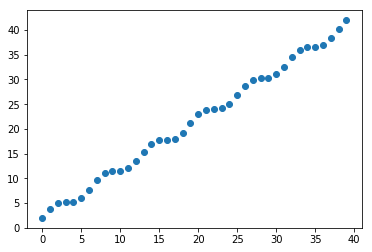

In [4]:
plt.scatter(x, y)

Let us check whether our functions work and fit the data well. First, we create an instance and then fit the model:

In [5]:
ex = LinearRegression()

Let us split the data:

In [6]:
X_train = x[:30]
X_test = x[30:]
y_train = y[:30]
y_test = y[30:]

In [7]:
ex.fit(X_train, y_train)

The function predict will give us the values of the vertical axis that will represent the straight line.

In [8]:
Y = ex.predict(X_test)

In [9]:
Y

array([31.98105079, 32.9771012 , 33.97315161, 34.96920202, 35.96525244,
       36.96130285, 37.95735326, 38.95340367, 39.94945408, 40.9455045 ])

Now, we plot both the data and the straight line. We can see that our model fits the data very well.

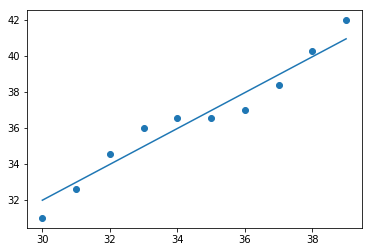

In [10]:
plt.scatter(X_test, y_test)
plt.plot(X_test, Y)

We expect the $R^2$ factor close to one. In fact we have:

In [11]:
ex.r_squared(X_train, y_train)

0.9935514577827103

Let us compute the mean absolute error and the root mean squared error:

In [12]:
print("MAE is ", ex.mean_absolute_error(X_train, y_train, X_test, y_test), ".")

print("RMSE is ", ex.root_mean_squared_error(X_train, y_train, X_test, y_test), ".")

MAE is  0.6823801233444566 .
RMSE is  0.7324761547610115 .


This value must be compared to other linear regression models and the smallest one represent the best model.

# Implementation with ScikitLearn

Let us now compare our results with the ones we would obtain with scikitlearn.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [14]:
#machine learing handle arrays
X_sk_train = np.array(X_train).reshape(-1,1)
y_sk_train = np.array(y_train).reshape(-1,1)
X_sk_test = np.array(X_test).reshape(-1,1)
y_sk_test = np.array(y_test).reshape(-1,1)

In [15]:
#we use Linear Regression + fit() is the training
model_sk = LinearRegression()
model_sk.fit(X_sk_train, y_sk_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
sk_ypred = model_sk.predict(X_sk_test)

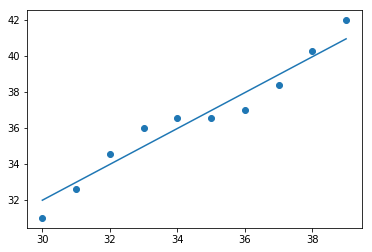

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test, sk_ypred.reshape(len(y_test)))

In [18]:
#R value, MAE, and RMSE
regression_model_mse = mean_squared_error(y_test, sk_ypred.reshape(len(y_test)))
regression_model_mae = mean_absolute_error(y_test, sk_ypred.reshape(len(y_test)))
print("R squared value is", model_sk.score(X_sk_train,y_sk_train), ".")
print("MAE is", regression_model_mae, ".")
print("RMSE is", np.sqrt(regression_model_mse), ".")

R squared value is 0.99355145778271 .
MAE is 0.6823801233444563 .
RMSE is 0.7324761547610105 .
